# Clase 04: Desarrollo

### Analizando el Coronavirus

Al leer simplemente la base de datos "data1_POSITIVOS=pd.read_csv("positivos_covid.csv)" estabamos obviando momentaneamente un paso previo que se puede automotizar, tambien es posible hacerlo "a mano" pero podría ser muy tedioso debido a la limpieza de nombres por caracteres extraños.

Tengamos en cuenta ademas que le hemos puesto codificación latin1 en lugar de utf-8 y que hemos puesto como delimitador ",". El tipo delimitador, si es como o punto y coma, dependerá de como venga el archivo de origen y por tanto en que idioma estaba en Excel original o del idioma en el que esté su computadora.

Hay dos fuentes de información importante, el MINSA y del Portal de Datos Abiertos del SINADEF. Para obtener los datos:


La data siempre nos va a interesa de la forma mas granular posible, en este caso es a nivel de distrito.



In [1]:
import pandas as pd
import os 
os.chdir(r'C:\Users\Diego\Desktop\Topicos de Eco Mate\Clases Parte 1°\Clase 06')

In [2]:
data_FALL=pd.read_csv('fallecidos_covid.csv', encoding= "latin1", delimiter=';')
#ojo: Usualmente las bases de datos flucutan entre latin1 y UTF-8. Podemos ir probando para ver cual queda.

In [3]:
data_FALL.head(2)

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210501,7320cabdc1aaca6c59014cae76a134e6,20200413,65,FEMENINO,19540607.0,LIMA,LIMA,LIMA
1,20210501,e81602051997ace8340bb8c18fe24c65,20200506,52,MASCULINO,NaN,ANCASH,SANTA,CHIMBOTE


In [4]:
data_POS=pd.read_csv('positivos_covid.csv', encoding='latin1', delimiter=';')

In [5]:
data_POS=pd.read_csv('positivos_covid.csv', encoding='UTF-8', delimiter=';')

In [6]:
data_POS.head(2)

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210501,7320cabdc1aaca6c59014cae76a134e6,ICA,ICA,LA TINGUIÑA,PR,37.0,FEMENINO,20200923.0
1,20210501,cecdbf10074dbc011ae05b3cbd320a6f,ICA,ICA,LA TINGUIÑA,PR,49.0,FEMENINO,20200923.0


In [7]:
data_FALL_SINA=pd.read_csv('fallecidos_sinadef.csv',encoding='latin1',delimiter=";")

c:\users\diego\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0,3,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data_FALL_SINA.head(2)

,Reporte del Sistema de Defunciones registrados al 03.05.2021 a las 00:00 horas,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,...,DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X),NaN,NaN,NaN,NaN


In [10]:
data_FALL_SINA=pd.read_csv('fallecidos_sinadef.csv',encoding='latin1',delimiter=";", skiprows=2)
data_FALL_SINA.head(2)

c:\users\diego\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,...,DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X),Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1,SIS,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SUPERIOR NO UNIV. COMP.,SIN REGISTRO,PERU,LA LIBERTAD,...,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN
1,2,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,...,SIN REGISTRO,SIN REGISTRO,PARALISIS CEREBRAL INFANTIL,G809,SIN REGISTRO,SIN REGISTRO,NaN,NaN,NaN,NaN


In [11]:
data_FALL_SINA=pd.read_csv('fallecidos_sinadef.csv',encoding='latin1',delimiter=";", skiprows=2).iloc[:,range(0,31)]
data_FALL_SINA.head(2)

c:\users\diego\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,...,DEBIDO A (CAUSA B),CAUSA B (CIE-X),DEBIDO A (CAUSA C),CAUSA C (CIE-X),DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X)
0,1,SIS,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SUPERIOR NO UNIV. COMP.,SIN REGISTRO,PERU,LA LIBERTAD,...,DIFICULTAD RESPIRATORIA DEL RECIEN NACIDO,P229,INMATURIDAD EXTREMA,P072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
1,2,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,...,NEUMONIA SEVERA,J159,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,PARALISIS CEREBRAL INFANTIL,G809,SIN REGISTRO,SIN REGISTRO


In [12]:
#necesitamos saber si tiene distrito
data_FALL_SINA.columns

Index(['Nº', 'TIPO SEGURO', 'SEXO', 'EDAD', 'TIEMPO EDAD', 'ESTADO CIVIL',
       'NIVEL DE INSTRUCCIÓN', 'COD# UBIGEO DOMICILIO', 'PAIS DOMICILIO',
       'DEPARTAMENTO DOMICILIO', 'PROVINCIA DOMICILIO', 'DISTRITO DOMICILIO',
       'FECHA', 'AÑO', 'MES', 'TIPO LUGAR', 'INSTITUCION', 'MUERTE VIOLENTA',
       'NECROPSIA', 'DEBIDO A (CAUSA A)', 'CAUSA A (CIE-X)',
       'DEBIDO A (CAUSA B)', 'CAUSA B (CIE-X)', 'DEBIDO A (CAUSA C)',
       'CAUSA C (CIE-X)', 'DEBIDO A (CAUSA D)', 'CAUSA D (CIE-X)',
       'DEBIDO A (CAUSA E)', 'CAUSA E (CIE-X)', 'DEBIDO A (CAUSA F)',
       'CAUSA F (CIE-X)'],
      dtype='object')

### Verificando duplicados

#### De entre los positivos:

Para poder hacer unión entre las tablas de positivios y fallecidos, debemos verificar si existen duplicados en la llave UUID

In [14]:
dups_IDPOS= data_POS.pivot_table(index=['UUID'], aggfunc='size')

In [15]:
(dups_IDPOS.min(),dups_IDPOS.max())

(1, 1)

#### De entre los fallecidos:

In [16]:
dups_IDFALL= data_FALL.pivot_table(index=['UUID'], aggfunc='size')

In [17]:
(dups_IDFALL.min(),dups_IDFALL.max())

(1, 1)

### Uniendo tablas

Habiendo verificando que no hya duplicados, podemos hacer un cruce, teniendo como base maestra a la data de positivos y asignando todos los UUID de fallecidos y los atributos de los fallecidos a la unión de estas dos tablas. Debemos fijarnos que la tabla de cruce debe tener el mismo tamaño que la tabla maestra, es decir 1533121 filas.

Queda como tarea para el alumno verificar si existen inconsistencias en las tablas, por ejemplo:

* ¿De cuando a cuando se registran los fallecidos?
* ¿De cuando a cuando se registran los positivos?
* Otros

In [15]:
data_POS.shape, data_FALL.shape

((1810998, 9), (62126, 9))

Solo para no perder las bases originales, crearemos una nueva con el contenido de las dos iniciales, pero con un nombre distinto.

Adicinalmente, para luego poder verificar que todos los datos de la base de fallecidos, base mas pequeña de solo aprox 50 mil datos haya cruzado, vamos a crear una columba llenas de 1's. Así, cuando el cruce se haya hecho, podremos sumar los 1s en la nueva base. Recordando que la base de fallecidos tiene 62126 la suma en la nueva base nos debe dar este mismo número. 

In [19]:
data_FALL['INDICADOR_EXISTENCIA']=1
data_POS['INDICADOR_EXISTENCIA2']=1

In [20]:
data_FALL.head(2)

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO,INDICADOR_EXISTENCIA
0,20210501,7320cabdc1aaca6c59014cae76a134e6,20200413,65,FEMENINO,19540607.0,LIMA,LIMA,LIMA,1
1,20210501,e81602051997ace8340bb8c18fe24c65,20200506,52,MASCULINO,NaN,ANCASH,SANTA,CHIMBOTE,1


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [22]:
x=data_FALL.groupby(['FECHA_FALLECIMIENTO'])['INDICADOR_EXISTENCIA'].sum()
x

FECHA_FALLECIMIENTO
20200318      1
20200319      3
20200320      2
20200321      1
20200322      2
           ... 
20210427    326
20210428    359
20210429    376
20210430    312
20210501    337
Name: INDICADOR_EXISTENCIA, Length: 409, dtype: int64

In [23]:
FALLECIDO_DIA=pd.DataFrame({'DIA':x.index,'FALL_DIA':x.values})
FALLECIDO_DIA.head()

,DIA,FALL_DIA
0,20200318,1
1,20200319,3
2,20200320,2
3,20200321,1
4,20200322,2


In [24]:
FALLECIDO_DIA.max()

DIA         20210501
FALL_DIA         433
dtype: int64

In [25]:
FALLECIDO_DIA.FALL_DIA.max()

433

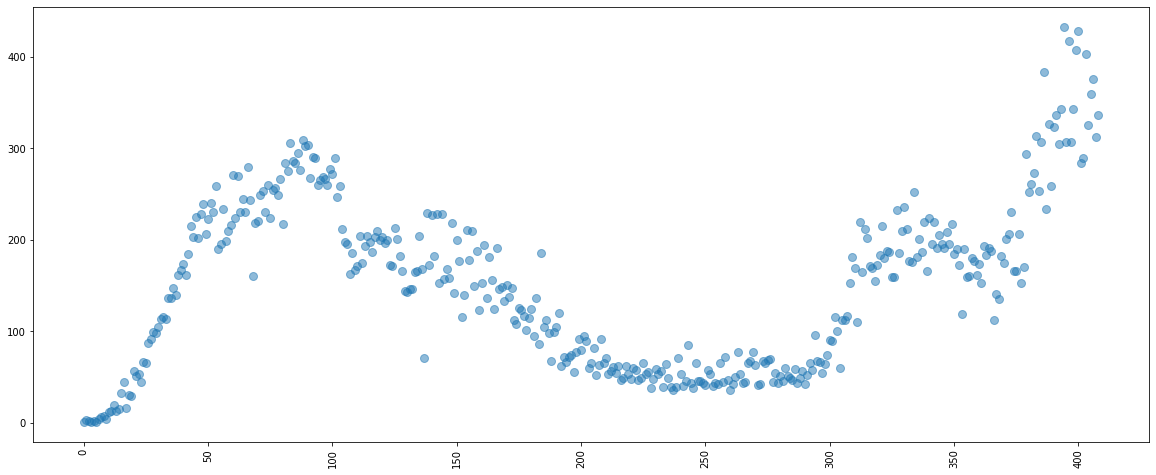

In [26]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.plot(FALLECIDO_DIA.index, FALLECIDO_DIA.FALL_DIA,marker='o', ms=8, linestyle='None',alpha=0.5)

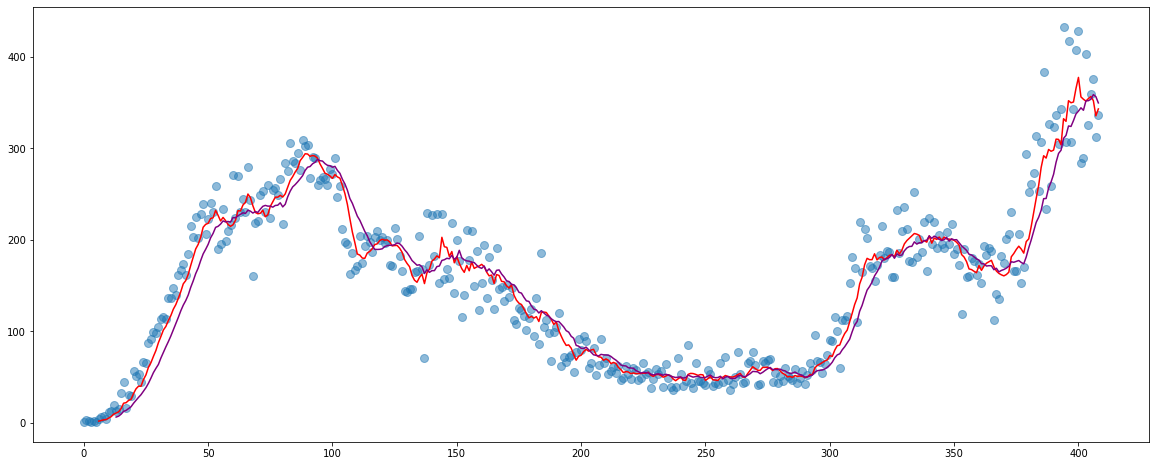

In [27]:
rolling = FALLECIDO_DIA.FALL_DIA.rolling(window=7)
rolling2= FALLECIDO_DIA.FALL_DIA.rolling(window=14)
rolling_mean= rolling.mean()
rolling_mean2= rolling2.mean()

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
FALLECIDO_DIA.FALL_DIA.plot(marker='o',ms=8,linestyle='None',alpha=0.5)
rolling_mean.plot(color='red')
rolling_mean2.plot(color='purple')
plt.show()

### ANALIZANDO LA CURVA DE POSITIVOS

In [28]:
x1=data_POS.groupby(['FECHA_RESULTADO'])['INDICADOR_EXISTENCIA2'].sum()
POSITIVO_DIA=pd.DataFrame({'DIA':x1.index, 'POS_DIA':x1.values})
POSITIVO_DIA

,DIA,POS_DIA
0,20200306.0,1
1,20200307.0,5
2,20200308.0,2
3,20200309.0,3
4,20200310.0,1
...,...,...
415,20210427.0,7050
416,20210428.0,6037
417,20210429.0,5904
418,20210430.0,5565


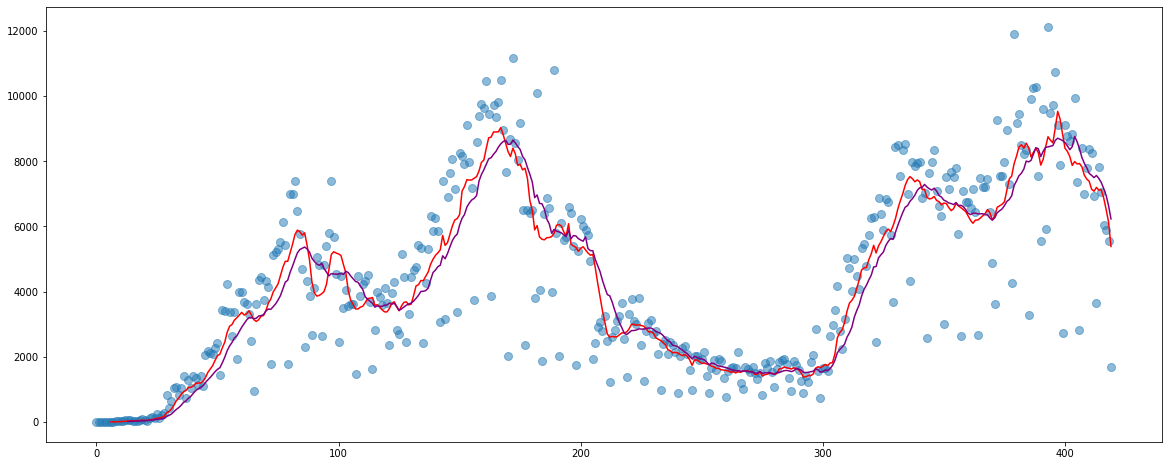

In [29]:
rolling3 = POSITIVO_DIA.POS_DIA.rolling(window=7)
rolling4= POSITIVO_DIA.POS_DIA.rolling(window=14)
rolling_mean3= rolling3.mean()
rolling_mean4= rolling4.mean()

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
POSITIVO_DIA.POS_DIA.plot(marker='o',ms=8,linestyle='None',alpha=0.5)
rolling_mean3.plot(color='red')
rolling_mean4.plot(color='purple')
plt.show()

### ¿Pueden  mezclarse ambas bases?

In [17]:
data_FALL['INDICADOR_EXISTENCIA1']=1
data_POS['INDICADOR_EXISTENCIA2']=1

In [16]:
data_POS.shape, data_FALL.shape

((1810998, 9), (62126, 9))

In [18]:
dataCruce1= pd.merge(data_POS, data_FALL, how='left' , left_on=['UUID'], right_on = ['UUID'])
dataCruce1.head() # REVISAR INCOHERENCIA DE DISTRITOS

,FECHA_CORTE_x,UUID,DEPARTAMENTO_x,PROVINCIA_x,DISTRITO_x,METODODX,EDAD,SEXO_x,FECHA_RESULTADO,INDICADOR_EXISTENCIA2,FECHA_CORTE_y,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO_y,FECHA_NAC,DEPARTAMENTO_y,PROVINCIA_y,DISTRITO_y,INDICADOR_EXISTENCIA
0,20210501,7320cabdc1aaca6c59014cae76a134e6,ICA,ICA,LA TINGUIÑA,PR,37.0,FEMENINO,20200923.0,1,20210501.0,20200413.0,65.0,FEMENINO,19540607.0,LIMA,LIMA,LIMA,1.0
1,20210501,cecdbf10074dbc011ae05b3cbd320a6f,ICA,ICA,LA TINGUIÑA,PR,49.0,FEMENINO,20200923.0,1,20210501.0,20200510.0,64.0,MASCULINO,19551104.0,PIURA,PIURA,PIURA,1.0
2,20210501,71ecb6bccb248b0bb2ac72ed51b5e979,ICA,ICA,LA TINGUIÑA,PR,36.0,FEMENINO,20200922.0,1,20210501.0,20200510.0,58.0,FEMENINO,19611004.0,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,1.0
3,20210501,566af4276cbe9359abe93f9aa86396c3,ICA,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PR,51.0,FEMENINO,20200922.0,1,20210501.0,20200414.0,53.0,MASCULINO,19660507.0,CALLAO,CALLAO,CALLAO,1.0
4,20210501,027561e9d126e7c283d79c02cede562d,ICA,ICA,LA TINGUIÑA,PR,36.0,FEMENINO,20201022.0,1,20210501.0,20200522.0,66.0,FEMENINO,NaN,ANCASH,SANTA,CHIMBOTE,1.0


In [32]:
dataCruce1.INDICADOR_EXISTENCIA.sum(), dataCruce1.shape[0]

(62126.0, 1810998)

In [32]:
data_POS.shape, data_FALL.shape

((1810998, 10), (62126, 10))

In [33]:
dataCruce1.columns

Index(['FECHA_CORTE_x', 'UUID', 'DEPARTAMENTO_x', 'PROVINCIA_x', 'DISTRITO_x',
       'METODODX', 'EDAD', 'SEXO_x', 'FECHA_RESULTADO',
       'INDICADOR_EXISTENCIA2', 'FECHA_CORTE_y', 'FECHA_FALLECIMIENTO',
       'EDAD_DECLARADA', 'SEXO_y', 'FECHA_NAC', 'DEPARTAMENTO_y',
       'PROVINCIA_y', 'DISTRITO_y', 'INDICADOR_EXISTENCIA'],
      dtype='object')

In [34]:
dataCruce2=dataCruce1[['UUID', 'DEPARTAMENTO_x', 'PROVINCIA_x', 'DISTRITO_x',
       'METODODX', 'EDAD', 'SEXO_x', 'FECHA_RESULTADO',
       'INDICADOR_EXISTENCIA2', 'FECHA_CORTE_y', 'FECHA_FALLECIMIENTO',
       'EDAD_DECLARADA', 'SEXO_y', 'FECHA_NAC', 'DEPARTAMENTO_y',
       'PROVINCIA_y', 'DISTRITO_y', 'INDICADOR_EXISTENCIA']]
dataCruce2.head()

,UUID,DEPARTAMENTO_x,PROVINCIA_x,DISTRITO_x,METODODX,EDAD,SEXO_x,FECHA_RESULTADO,INDICADOR_EXISTENCIA2,FECHA_CORTE_y,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO_y,FECHA_NAC,DEPARTAMENTO_y,PROVINCIA_y,DISTRITO_y,INDICADOR_EXISTENCIA
0,7320cabdc1aaca6c59014cae76a134e6,ICA,ICA,LA TINGUIÑA,PR,37.0,FEMENINO,20200923.0,1,20210501.0,20200413.0,65.0,FEMENINO,19540607.0,LIMA,LIMA,LIMA,1.0
1,cecdbf10074dbc011ae05b3cbd320a6f,ICA,ICA,LA TINGUIÑA,PR,49.0,FEMENINO,20200923.0,1,20210501.0,20200510.0,64.0,MASCULINO,19551104.0,PIURA,PIURA,PIURA,1.0
2,71ecb6bccb248b0bb2ac72ed51b5e979,ICA,ICA,LA TINGUIÑA,PR,36.0,FEMENINO,20200922.0,1,20210501.0,20200510.0,58.0,FEMENINO,19611004.0,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,1.0
3,566af4276cbe9359abe93f9aa86396c3,ICA,EN INVESTIGACIÓN,EN INVESTIGACIÓN,PR,51.0,FEMENINO,20200922.0,1,20210501.0,20200414.0,53.0,MASCULINO,19660507.0,CALLAO,CALLAO,CALLAO,1.0
4,027561e9d126e7c283d79c02cede562d,ICA,ICA,LA TINGUIÑA,PR,36.0,FEMENINO,20201022.0,1,20210501.0,20200522.0,66.0,FEMENINO,NaN,ANCASH,SANTA,CHIMBOTE,1.0


In [35]:
sum(dataCruce2['DEPARTAMENTO_x']==dataCruce2['DEPARTAMENTO_y'])

9732

#### NOTA1: 
Deberian ser aproximadamente la misma cantidad de personas fallecidas

In [36]:
sum(dataCruce2['PROVINCIA_x']==dataCruce2['PROVINCIA_y'])

8105

In [37]:
sum(dataCruce2['DISTRITO_x']==dataCruce2['DISTRITO_y'])

498

#### Aparentemente no

## ANALIZANDO LA DATA DEL SINADEF

In [38]:
data_FALL_SINA.columns

Index(['Nº', 'TIPO SEGURO', 'SEXO', 'EDAD', 'TIEMPO EDAD', 'ESTADO CIVIL',
       'NIVEL DE INSTRUCCIÓN', 'COD# UBIGEO DOMICILIO', 'PAIS DOMICILIO',
       'DEPARTAMENTO DOMICILIO', 'PROVINCIA DOMICILIO', 'DISTRITO DOMICILIO',
       'FECHA', 'AÑO', 'MES', 'TIPO LUGAR', 'INSTITUCION', 'MUERTE VIOLENTA',
       'NECROPSIA', 'DEBIDO A (CAUSA A)', 'CAUSA A (CIE-X)',
       'DEBIDO A (CAUSA B)', 'CAUSA B (CIE-X)', 'DEBIDO A (CAUSA C)',
       'CAUSA C (CIE-X)', 'DEBIDO A (CAUSA D)', 'CAUSA D (CIE-X)',
       'DEBIDO A (CAUSA E)', 'CAUSA E (CIE-X)', 'DEBIDO A (CAUSA F)',
       'CAUSA F (CIE-X)'],
      dtype='object')

In [39]:
data_FALL_SINA.head(2)

,Nº,TIPO SEGURO,SEXO,EDAD,TIEMPO EDAD,ESTADO CIVIL,NIVEL DE INSTRUCCIÓN,COD# UBIGEO DOMICILIO,PAIS DOMICILIO,DEPARTAMENTO DOMICILIO,...,DEBIDO A (CAUSA B),CAUSA B (CIE-X),DEBIDO A (CAUSA C),CAUSA C (CIE-X),DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X),DEBIDO A (CAUSA F),CAUSA F (CIE-X)
0,1,SIS,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SUPERIOR NO UNIV. COMP.,SIN REGISTRO,PERU,LA LIBERTAD,...,DIFICULTAD RESPIRATORIA DEL RECIEN NACIDO,P229,INMATURIDAD EXTREMA,P072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
1,2,SIS,MASCULINO,4,AÑOS,SOLTERO,IGNORADO,92-33-21-04-01-000,PERU,SAN MARTIN,...,NEUMONIA SEVERA,J159,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,PARALISIS CEREBRAL INFANTIL,G809,SIN REGISTRO,SIN REGISTRO


In [40]:
data_FALL_SINA.shape

(661112, 31)

In [41]:
data_FALL_SINA.iloc[:,range(19,29)].head(2)

,DEBIDO A (CAUSA A),CAUSA A (CIE-X),DEBIDO A (CAUSA B),CAUSA B (CIE-X),DEBIDO A (CAUSA C),CAUSA C (CIE-X),DEBIDO A (CAUSA D),CAUSA D (CIE-X),DEBIDO A (CAUSA E),CAUSA E (CIE-X)
0,ASFIXIA DE NACIMIENTO SEVERA,P210,DIFICULTAD RESPIRATORIA DEL RECIEN NACIDO,P229,INMATURIDAD EXTREMA,P072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
1,INSUFICIENCIA RESPIRATORIA AGUDA,J960,NEUMONIA SEVERA,J159,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,PARALISIS CEREBRAL INFANTIL,G809


In [42]:
data_FALL_SINA['DEBIDO A (CAUSA A)'].value_counts().nlargest(30)

INSUFICIENCIA RESPIRATORIA AGUDA                  107594
INSUFICIENCIA RESPIRATORIA                         92865
FALLA MULTIORGANICA                                25892
INFARTO AGUDO DE MIOCARDIO                         13319
SEPSIS                                             13110
SHOCK SEPTICO                                      12990
PARO CARDIORESPIRATORIO                             9541
INFARTO AGUDO DEL MIOCARDIO                         8999
NEUMONIA                                            7320
PARO CARDIO RESPIRATORIO                            7257
PARO RESPIRATORIO                                   7006
SEPTICEMIA                                          6665
SHOCK HIPOVOLEMICO                                  5139
FALLA ORGANICA MULTIPLE                             4786
CHOQUE SEPTICO                                      4528
EDEMA CEREBRAL                                      4361
INSUFICIENCIA CARDIACA                              3986
CHOQUE CARDIOGENICO            

In [43]:
import re
data_FALL_SINA['INDICADOR_EXISTENCIA3']=1

In [44]:
data_FALL_SINA['DEBIDO A (CAUSA A)'].str.contains("COV\w+").value_counts()

False    648897
True      12215
Name: DEBIDO A (CAUSA A), dtype: int64

In [45]:
data_FALL_SINA['DEBIDO A (CAUSA A)'].str.findall("COV\w+")

0         []
1         []
2         []
3         []
4         []
          ..
661107    []
661108    []
661109    []
661110    []
661111    []
Name: DEBIDO A (CAUSA A), Length: 661112, dtype: object

In [46]:
data_FALL_SINA.loc[data_FALL_SINA['DEBIDO A (CAUSA A)'].str.contains("COV\w+"), 'COVID_POSITIVO']= 'COVID19'

In [47]:
data_FALL_SINA['COVID_POSITIVO'].value_counts()

COVID19    12215
Name: COVID_POSITIVO, dtype: int64

In [48]:
data_FALL_SINA.columns

Index(['Nº', 'TIPO SEGURO', 'SEXO', 'EDAD', 'TIEMPO EDAD', 'ESTADO CIVIL',
       'NIVEL DE INSTRUCCIÓN', 'COD# UBIGEO DOMICILIO', 'PAIS DOMICILIO',
       'DEPARTAMENTO DOMICILIO', 'PROVINCIA DOMICILIO', 'DISTRITO DOMICILIO',
       'FECHA', 'AÑO', 'MES', 'TIPO LUGAR', 'INSTITUCION', 'MUERTE VIOLENTA',
       'NECROPSIA', 'DEBIDO A (CAUSA A)', 'CAUSA A (CIE-X)',
       'DEBIDO A (CAUSA B)', 'CAUSA B (CIE-X)', 'DEBIDO A (CAUSA C)',
       'CAUSA C (CIE-X)', 'DEBIDO A (CAUSA D)', 'CAUSA D (CIE-X)',
       'DEBIDO A (CAUSA E)', 'CAUSA E (CIE-X)', 'DEBIDO A (CAUSA F)',
       'CAUSA F (CIE-X)', 'INDICADOR_EXISTENCIA3', 'COVID_POSITIVO'],
      dtype='object')

In [49]:
data_FALL_SINA2=data_FALL_SINA[['Nº', 'TIPO SEGURO', 'SEXO', 'EDAD', 'TIEMPO EDAD', 'ESTADO CIVIL',
       'NIVEL DE INSTRUCCIÓN', 'COD# UBIGEO DOMICILIO', 'PAIS DOMICILIO',
       'DEPARTAMENTO DOMICILIO', 'PROVINCIA DOMICILIO', 'DISTRITO DOMICILIO',
       'FECHA', 'AÑO', 'MES', 'TIPO LUGAR', 'INSTITUCION', 'MUERTE VIOLENTA',
       'NECROPSIA', 'DEBIDO A (CAUSA A)', 'CAUSA A (CIE-X)',
       'DEBIDO A (CAUSA B)', 'CAUSA B (CIE-X)', 'DEBIDO A (CAUSA C)',
       'CAUSA C (CIE-X)', 'DEBIDO A (CAUSA D)', 'CAUSA D (CIE-X)',
       'DEBIDO A (CAUSA E)', 'CAUSA E (CIE-X)', 'DEBIDO A (CAUSA F)',
       'CAUSA F (CIE-X)', 'INDICADOR_EXISTENCIA3', 'COVID_POSITIVO']]

In [50]:
data_FALL_SINA2[data_FALL_SINA2.COVID_POSITIVO.notnull()].iloc[:,range(18,25)]

,NECROPSIA,DEBIDO A (CAUSA A),CAUSA A (CIE-X),DEBIDO A (CAUSA B),CAUSA B (CIE-X),DEBIDO A (CAUSA C),CAUSA C (CIE-X)
26,NO SE REALIZÓ NECROPSIA,COVID 19,U071,VIH,B200,SIN REGISTRO,SIN REGISTRO
39,NO SE REALIZÓ NECROPSIA,SOSPECHA COVID,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
96,NO SE REALIZÓ NECROPSIA,SOSPECHA DE COVID 19,U072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
137,NO SE REALIZÓ NECROPSIA,COVID 19,U071,INSUFICIENCIA RESPIRATORIA AGUDA,J960,SIN REGISTRO,SIN REGISTRO
155,NO SE REALIZÓ NECROPSIA,SOSPECHA DE COVID 19,U072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
...,...,...,...,...,...,...,...
660445,NO SE REALIZÓ NECROPSIA,INFECCION POR COVID,U071,NEUMONIA,J189,SHOCK SEPTICO,A419
660570,NO SE REALIZÓ NECROPSIA,COVID 19 VIRUS IDENTIFICADO,U071,INSUFICIENCIA RESPIRATORIA AGUDA,J960,DIABETES MELLITUS TIPO 2,E115
660688,NO SE REALIZÓ NECROPSIA,INFECCION POR COVID 19,U071,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO
661030,NO SE REALIZÓ NECROPSIA,COVID 19 VIRUS NO IDENTIFICADO,U072,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO,SIN REGISTRO


In [51]:
data_FALL_SINA2[['FECHA','AÑO','MES']].head()

,FECHA,AÑO,MES
0,2021-01-19,2021,1
1,2020-01-17,2020,1
2,2021-01-31,2021,1
3,2020-01-03,2020,1
4,2020-01-19,2020,1


In [52]:
data_FALL_SINA2.shape

(661112, 33)

In [53]:
data_FALL_SINA2.FECHA.min(), data_FALL_SINA2.FECHA.max()

('2017-01-01', '2021-05-03')

In [54]:
xyz=data_FALL_SINA2.groupby(['FECHA'])['INDICADOR_EXISTENCIA3'].sum()
xyz

FECHA
2017-01-01     270
2017-01-02     238
2017-01-03     220
2017-01-04     229
2017-01-05     211
              ... 
2021-04-29    1099
2021-04-30     990
2021-05-01    1002
2021-05-02     969
2021-05-03     509
Name: INDICADOR_EXISTENCIA3, Length: 1584, dtype: int64

In [55]:
FALL_SINA_DIA=pd.DataFrame({'DIA':xyz.index, 'FALL_SINAD_DIA':xyz.values})
FALL_SINA_DIA

,DIA,FALL_SINAD_DIA
0,2017-01-01,270
1,2017-01-02,238
2,2017-01-03,220
3,2017-01-04,229
4,2017-01-05,211
...,...,...
1579,2021-04-29,1099
1580,2021-04-30,990
1581,2021-05-01,1002
1582,2021-05-02,969


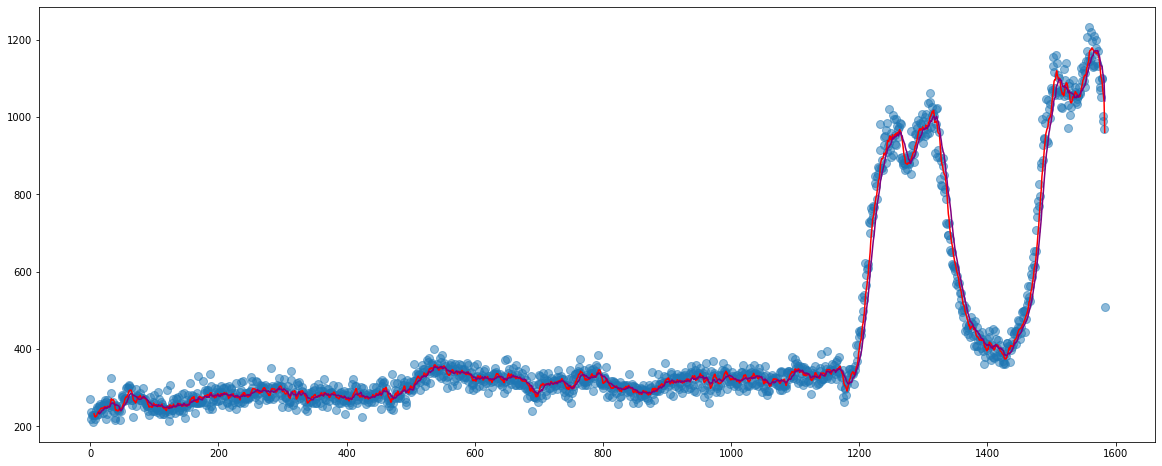

In [56]:
rolling5 = FALL_SINA_DIA.FALL_SINAD_DIA.rolling(window=7)
rolling6= FALL_SINA_DIA.FALL_SINAD_DIA.rolling(window=14)
rolling_mean5= rolling5.mean()
rolling_mean6= rolling6.mean()

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
FALL_SINA_DIA.FALL_SINAD_DIA.plot(marker='o',ms=8,linestyle='None',alpha=0.5)
rolling_mean5.plot(color='red')
rolling_mean6.plot(color='purple')
plt.show()

In [57]:
yyy=data_FALL_SINA2.groupby(['AÑO','MES'])['INDICADOR_EXISTENCIA3'].sum()

In [58]:
yyy.index

MultiIndex([(2017,  1),
            (2017,  2),
            (2017,  3),
            (2017,  4),
            (2017,  5),
            (2017,  6),
            (2017,  7),
            (2017,  8),
            (2017,  9),
            (2017, 10),
            (2017, 11),
            (2017, 12),
            (2018,  1),
            (2018,  2),
            (2018,  3),
            (2018,  4),
            (2018,  5),
            (2018,  6),
            (2018,  7),
            (2018,  8),
            (2018,  9),
            (2018, 10),
            (2018, 11),
            (2018, 12),
            (2019,  1),
            (2019,  2),
            (2019,  3),
            (2019,  4),
            (2019,  5),
            (2019,  6),
            (2019,  7),
            (2019,  8),
            (2019,  9),
            (2019, 10),
            (2019, 11),
            (2019, 12),
            (2020,  1),
            (2020,  2),
            (2020,  3),
            (2020,  4),
            (2020,  5),
            (202

In [59]:
anio_mes=pd.DataFrame(yyy.index.get_level_values(0).astype(str)+'_'+yyy.index.get_level_values(1).astype(str))

In [60]:
anio_mes.head()

,0
0,2017_1
1,2017_2
2,2017_3
3,2017_4
4,2017_5


In [61]:
FALL_SINA_MES=pd.DataFrame({'ANIO_MES':anio_mes[0], 'FALL_SINA_MES':yyy.values})
FALL_SINA_MES.head()

,ANIO_MES,FALL_SINA_MES
0,2017_1,7534
1,2017_2,7271
2,2017_3,8461
3,2017_4,7507
4,2017_5,7891


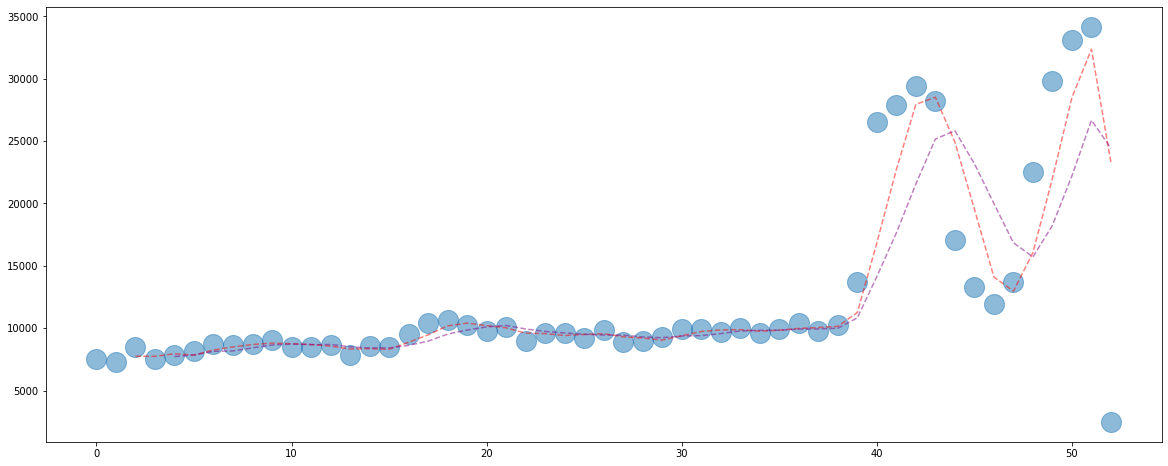

In [62]:
rolling7 = FALL_SINA_MES.FALL_SINA_MES.rolling(window=3)
rolling8= FALL_SINA_MES.FALL_SINA_MES.rolling(window=5)
rolling_mean7= rolling7.mean()
rolling_mean8= rolling8.mean()

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
FALL_SINA_MES.FALL_SINA_MES.plot(marker='o',ms=20,linestyle='None',alpha=0.5)
rolling_mean7.plot(color='red',linestyle='--',alpha=0.5)
rolling_mean8.plot(color='purple',linestyle='--',alpha=0.5)
plt.show()

#### Ahora vemos el número de fallecidos por año, usando nuestra primera función

In [63]:
def funcion(x):
    return 5*x

In [64]:
abc=data_FALL_SINA2.groupby(['AÑO'])['INDICADOR_EXISTENCIA3'].sum()
FALL_SINA_ANIO=pd.DataFrame({'ANIO':abc.index, 'FALL_SINA_ANIO':abc.values})
FALL_SINA_ANIO.head()

,ANIO,FALL_SINA_ANIO
0,2017,98973
1,2018,112813
2,2019,114942
3,2020,212259
4,2021,122125


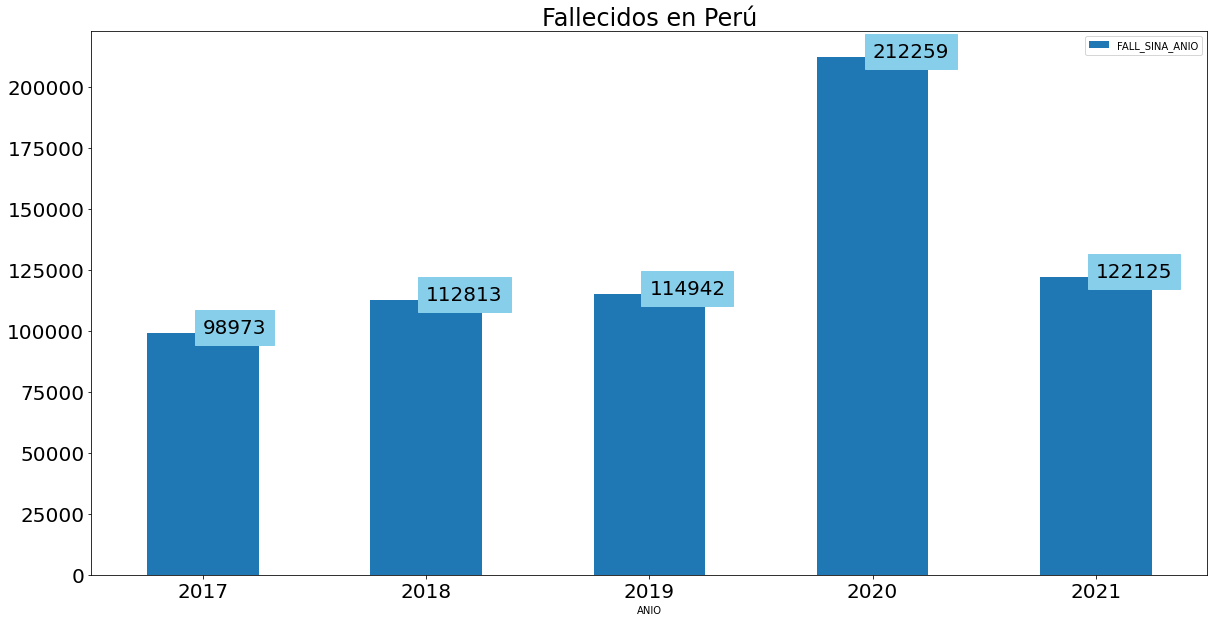

In [86]:
plt.rcParams["figure.figsize"] =(20,10)
FALL_SINA_ANIO.plot(x="ANIO",y=["FALL_SINA_ANIO"],kind="bar")
plt.title("Fallecidos en Perú", fontsize=24)
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=20)

x = FALL_SINA_ANIO["ANIO"]
y = FALL_SINA_ANIO["FALL_SINA_ANIO"]

fx =1
fy =1
for i, v in enumerate(x):
    plt.text(i*fx, y[i]*fy,str(int(y[i])), color='black', backgroundcolor= "skyblue",fontsize = 20 ,rotation= 0)

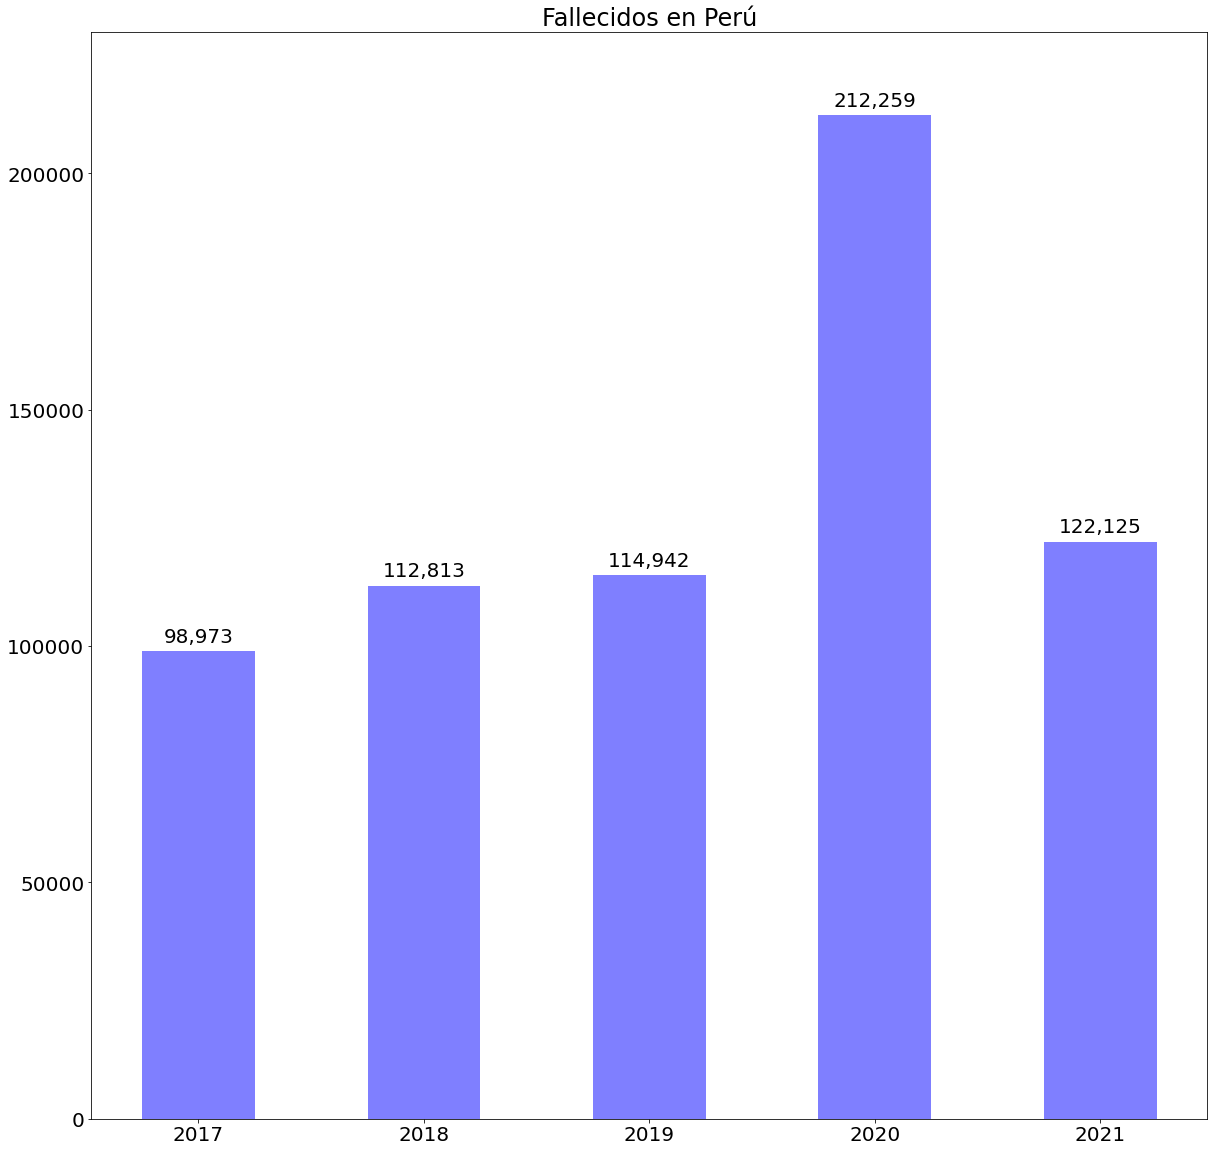

In [65]:
fig, ax = plt.subplots(figsize=(20,20))
# ax=FALL_SINA_ANIO.FALL_SINA_ANIO.plot(kind='bar')
# fig = plt.figure()
plt.ylim([0,230000])
plt.bar(FALL_SINA_ANIO.ANIO,FALL_SINA_ANIO.FALL_SINA_ANIO, color='blue', width=0.5, alpha=0.5)
plt.title("Fallecidos en Perú", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# funcion para poner etiquetas sobre las barras
def add_value_labels(ax, spacing=5):
    
    # Para cada barra poner una etiqueta
    for rect in ax.patches:
        #Obteniendo los valores y pocisiones de la etiqueta
        y_value = rect.get_height()
        x_value= rect.get_x() + rect.get_width()/2
        
        # Espacio entre la etiqueta y la barra
        space= spacing
        # Tipo de alineamiento
        va= 'bottom'
        
        # dando formato con 0 decimales, podemos cambiar el 0 por cualquier número, por ejemplo 1 y tendra 1 decimal
        # Hay que notar que el punto se pone para el decimarl y la coma como separador de miles
        label = "{:,.0f}".format(y_value)
        
        # Añadiendo la anotación
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            size=20,                      # Tamaño de letra
            textcoords="offset points",   # para interpretar xytext como espacio (offset) entre puntos
            ha='center',
            va=va)                        # alienamiento vertical
                
#llamando a la funcion creada
add_value_labels(ax)
plt.show()
        


In [66]:
ax.patches

### TAREA:

La idea de cruzar las bases de Positivos y Fallecidos, era ver la evolución del paciente, esto solo es posible si se trata de la misma persona. Aun cuando todos los campos cruzan, observamos que podrían rtatarse de personas distintas.

* A partir de los resultados de la referencia en la NOTA1 sotenemos que debería haber aproximadamente la misma cantidad de personas fallecidas en un mismo departamento, sin embargo obtenemos una igualdad inferior al 25% del total cruzado. Las razones pueden ser múltiples, entre ellas qeu haya diferencias en el formato de caracteres . Por ejemplo no se hacen iguales porque Python toma la escritura textual y en tal sentido A!=A (recordar que 1= significa "no es igual" en una condición lógica del lenguaje Pyhton), si la palabra en evaluación fuera AZÁNGARO.
  
  * ¿Cuantos casos de este tipo encuentra en la base de datos?
  * Para los casos que no son de este tipo. ¿Que explicación daría a la diferencia?
  * ¿Que otros metodos de validación podríamos usar para saber si se trata o no de la misma persona?
  
* Existe un incremento significativo de la causa de muerte por INSUFICIENCIA RESPIRATORIA AGUDA en los años 2020 y 2021, respecto a los otros años? Muestre gráficamente y en una tabla de frecuencias (value_counts).


  * dataCruce1['DEPARTAMENTO_x'] = dataCruce1['DEPARTAMENTO_x'].str.replace('Á','A')
  * dataCruce1['DEPARTAMENTO_x'] = dataCruce1['DEPARTAMENTO_x'].str.replace('É','E')
  * dataCruce1['DEPARTAMENTO_x'] = dataCruce1['DEPARTAMENTO_x'].str.replace('Í','I')
  * dataCruce1['DEPARTAMENTO_x'] = dataCruce1['DEPARTAMENTO_x'].str.replace('Ó','O')
  * dataCruce1['DEPARTAMENTO_x'] = dataCruce1['DEPARTAMENTO_x'].str.replace('Ú','U')
  * dataCruce1['DEPARTAMENTO_x'] = dataCruce1['DEPARTAMENTO_x'].str.replace('Ñ','N')

  * dataCruce1['PROVINCIA_x']= dataCruce1['PROVINCIA_x'].str.replace('Á','A')
  * dataCruce1['PROVINCIA_x'] = dataCruce1['PROVINCIA_x'].str.replace('É','E')
  * dataCruce1['PROVINCIA_x'] = dataCruce1['PROVINCIA_x'].str.replace('Í','I')
  * dataCruce1['PROVINCIA_x'] = dataCruce1['PROVINCIA_x'].str.replace('Ó','O')
  * dataCruce1['PROVINCIA_x'] = dataCruce1['PROVINCIA_x'].str.replace('Ú','U')
  * dataCruce1['PROVINCIA_x'] = dataCruce1['PROVINCIA_x'].str.replace('Ñ','N')

  * dataCruce1['DISTRITO_x']= dataCruce1['DISTRITO_x'].str.replace('Á','A')
  * dataCruce1['DISTRITO_x'] = dataCruce1['DISTRITO_x'].str.replace('É','E')
  * dataCruce1['DISTRITO_x'] = dataCruce1['DISTRITO_x'].str.replace('Í','I')
  * dataCruce1['DISTRITO_x'] = dataCruce1['DISTRITO_x'].str.replace('Ó','O')
  * dataCruce1['DISTRITO_x'] = dataCruce1['DISTRITO_x'].str.replace('Ú','U')
  * dataCruce1['DISTRITO_x'] = dataCruce1['DISTRITO_x'].str.replace('Ñ','N')










